# Import statements

In [8]:
from dwt import dwt_2d
from dct import apply_2d_dct_all_blocks, update_dct_block
from watermark_encryption import get_watermark_img, keygen, generate_2d_key, encrypt_watermark, decrypt_watermark
from helpers import create_non_overlapping_blocks
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import config

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

# Water Mark Image Encryption

In [21]:
watermark_img = get_watermark_img() # Gets a 32*32 binary watermark logo

# plt.imsave('../assets/watermark_32_32.jpeg', watermark_img, cmap=cm.gray)

In [3]:
# enc_key = generate_2d_key(32, 32)
# with open('../assets/encryption_key.npy', 'wb') as f:
#     np.save(f, np.array(enc_key))

In [22]:
with open('../assets/encryption_key.npy', 'rb') as f:
    enc_key = np.load(f)

In [24]:
enc_key

array([[0, 0, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [23]:
wat_enc = encrypt_watermark(watermark_img, enc_key)
original_watermark = decrypt_watermark(wat_enc, enc_key)

## Plot the watermark pictures

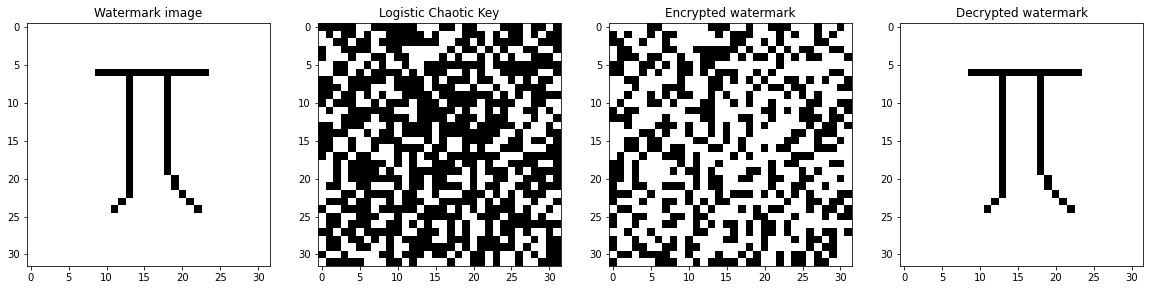

In [6]:
plt.figure(figsize=(20, 5))

# Plot original watermark image
ax = plt.subplot(1, 4, 1)
plt.imshow(watermark_img)
plt.title( "Watermark image")
plt.gray()

# Plot encrypted watermark image
ax = plt.subplot(1, 4, 2)
plt.imshow(enc_key)
plt.title( "Logistic Chaotic Key")
plt.gray()

# Plot encrypted watermark image
ax = plt.subplot(1, 4, 3)
plt.imshow(wat_enc)
plt.title( "Encrypted watermark")
plt.gray()

# Plot encrypted watermark image
ax = plt.subplot(1, 4, 4)
plt.imshow(original_watermark)
plt.title( "Decrypted watermark")
plt.gray()

plt.show()

# Read the image

In [11]:
# img = Image.open(config.train_images_path + "zelda.tif")
img = Image.open(config.train_images_path + "lena_512x512.gif")
# img = Image.open("../assets/Lena_512x512.jpg")

In [12]:
img = img.convert(mode='L') # convert image to grayscale

In [13]:
img = img.resize((512, 512))

In [14]:
img = np.asarray(img)
print("Image shape: ", img.shape)

Image shape:  (512, 512)


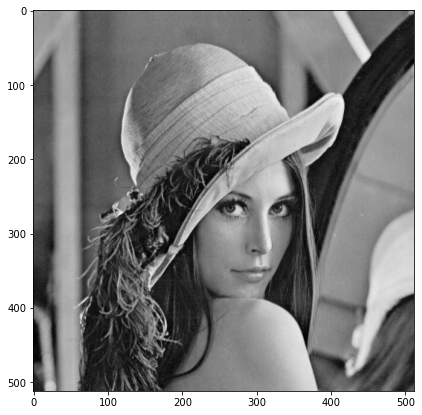

In [15]:
f = plt.figure()
plt.imshow(img,cmap='gray')

# Apply 2D_DWT

In [16]:
coeffs = dwt_2d(img, 'haar')
LL, (LH, HL, HH) = coeffs

print("LL coefficient shape: ", LL.shape)

LL coefficient shape:  (256, 256)


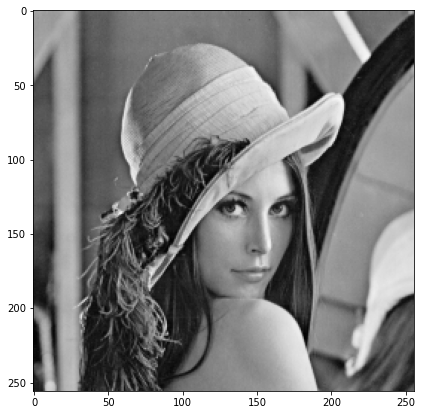

In [17]:
f = plt.figure()
plt.imshow(LL,cmap='gray')

# Apply 2D_DCT

In [18]:
non_overlapping_blocks = create_non_overlapping_blocks(LL, (8, 8))
dct_blocks = apply_2d_dct_all_blocks(non_overlapping_blocks)

print("Size of Non overlapping blocks", non_overlapping_blocks.shape)
print("Size of Non overlapping DCT blocks", dct_blocks.shape)

Size of Non overlapping blocks (32, 32, 8, 8)
Size of Non overlapping DCT blocks (32, 32, 8, 8)


## Apply the paper algorithm for a single dct block

In [15]:
current_dct_block_updated = update_dct_block(dct_blocks[0][0], wat_enc)

## Plot the pictures

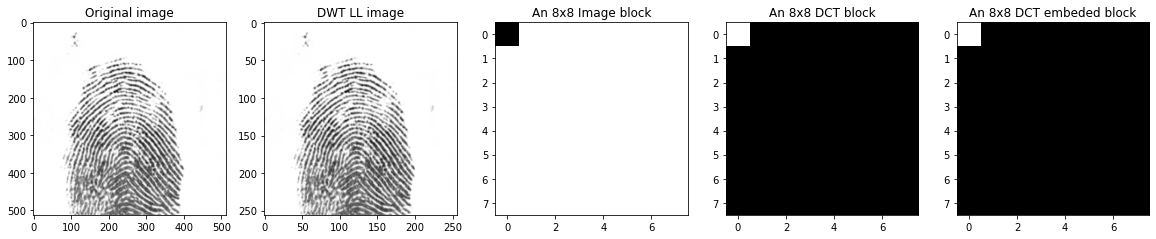

In [16]:
random_block_x, random_block_y = (0, 0)
plt.figure(figsize=(20, 8))

# Plot original image
ax = plt.subplot(1, 5, 1)
plt.imshow(img)
plt.title( "Original image")
plt.gray()

# Plot LL of DWT-2D
ax = plt.subplot(1, 5, 2)
plt.imshow(LL)
plt.title( "DWT LL image")
plt.gray()

# Extract a block from image
ax = plt.subplot(1, 5, 3)
plt.imshow(non_overlapping_blocks[random_block_x][random_block_y])
plt.title( "An 8x8 Image block")
plt.gray()

# Display the dct of that block
ax = plt.subplot(1, 5, 4)
plt.imshow(dct_blocks[random_block_x][random_block_y])
plt.title( "An 8x8 DCT block")
plt.gray()

# Display the embeded dct of that block
ax = plt.subplot(1, 5, 5)
plt.imshow(current_dct_block_updated)
plt.title( "An 8x8 DCT embeded block")
plt.gray()

plt.show()

# Plot original image and watermark embedded image

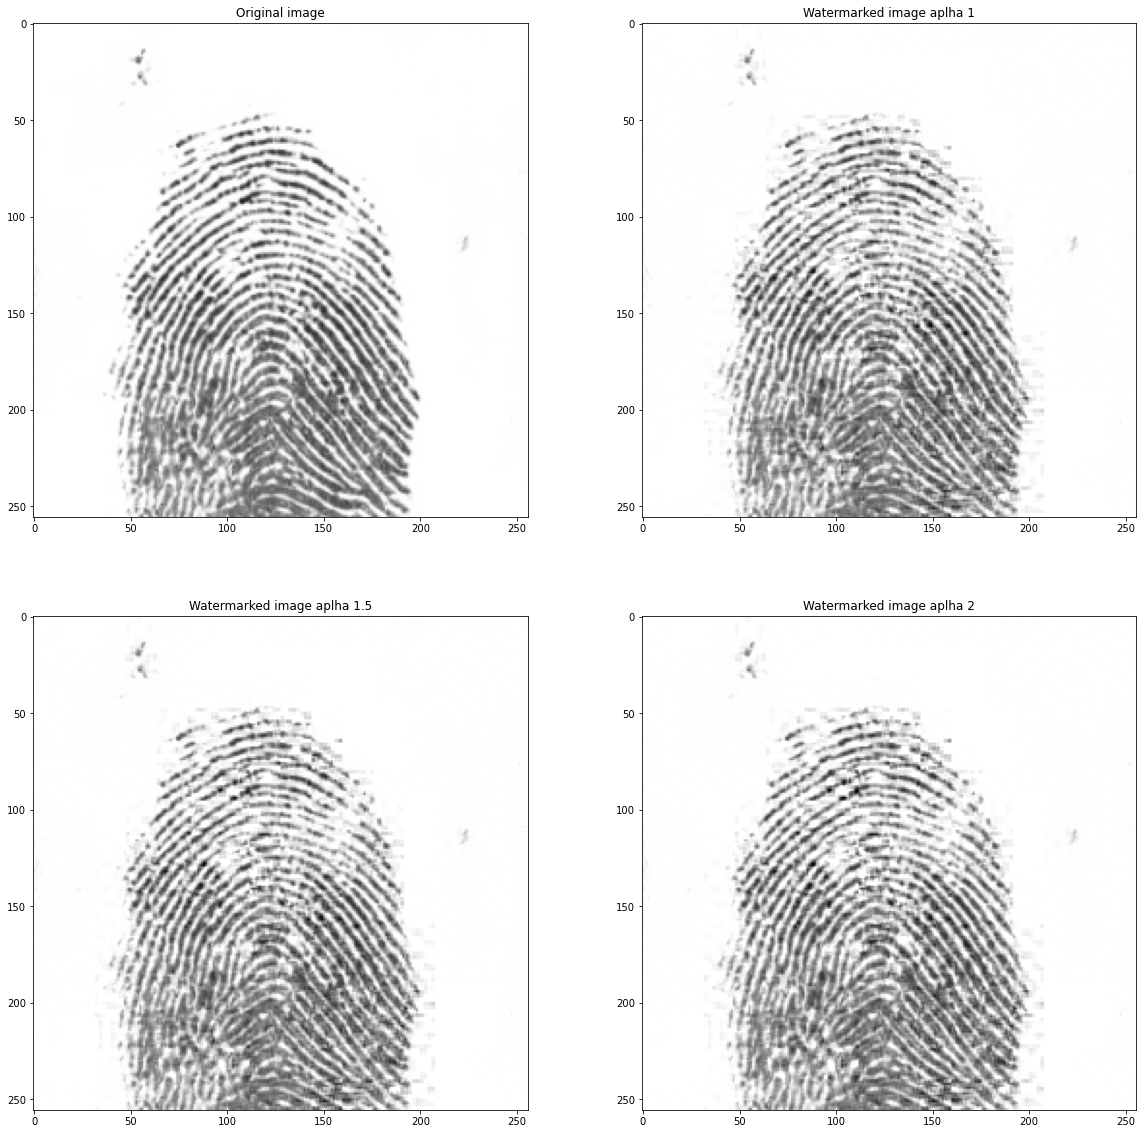

In [3]:
ori_img = Image.open(config.train_images_path + "resized_175_fake_B.png")
wat_img_1 = Image.open(config.embedded_images_path + "resized_175_fake_B_1.png")
wat_img_15 = Image.open(config.embedded_images_path + "resized_175_fake_B_15.png")
wat_img_2 = Image.open(config.embedded_images_path + "resized_175_fake_B_2.png")
plt.figure(figsize=(20, 20))

# Plot original image
ax = plt.subplot(2, 2, 1)
plt.imshow(ori_img)
plt.title( "Original image")
plt.gray()

# Plot LL of DWT-2D
ax = plt.subplot(2, 2, 2)
plt.imshow(wat_img_1)
plt.title( "Watermarked image aplha 1")
plt.gray()

# Plot LL of DWT-2D
ax = plt.subplot(2, 2, 3)
plt.imshow(wat_img_15)
plt.title( "Watermarked image aplha 1.5")
plt.gray()

# Plot LL of DWT-2D
ax = plt.subplot(2, 2, 4)
plt.imshow(wat_img_2)
plt.title( "Watermarked image aplha 2")
plt.gray()

plt.show()

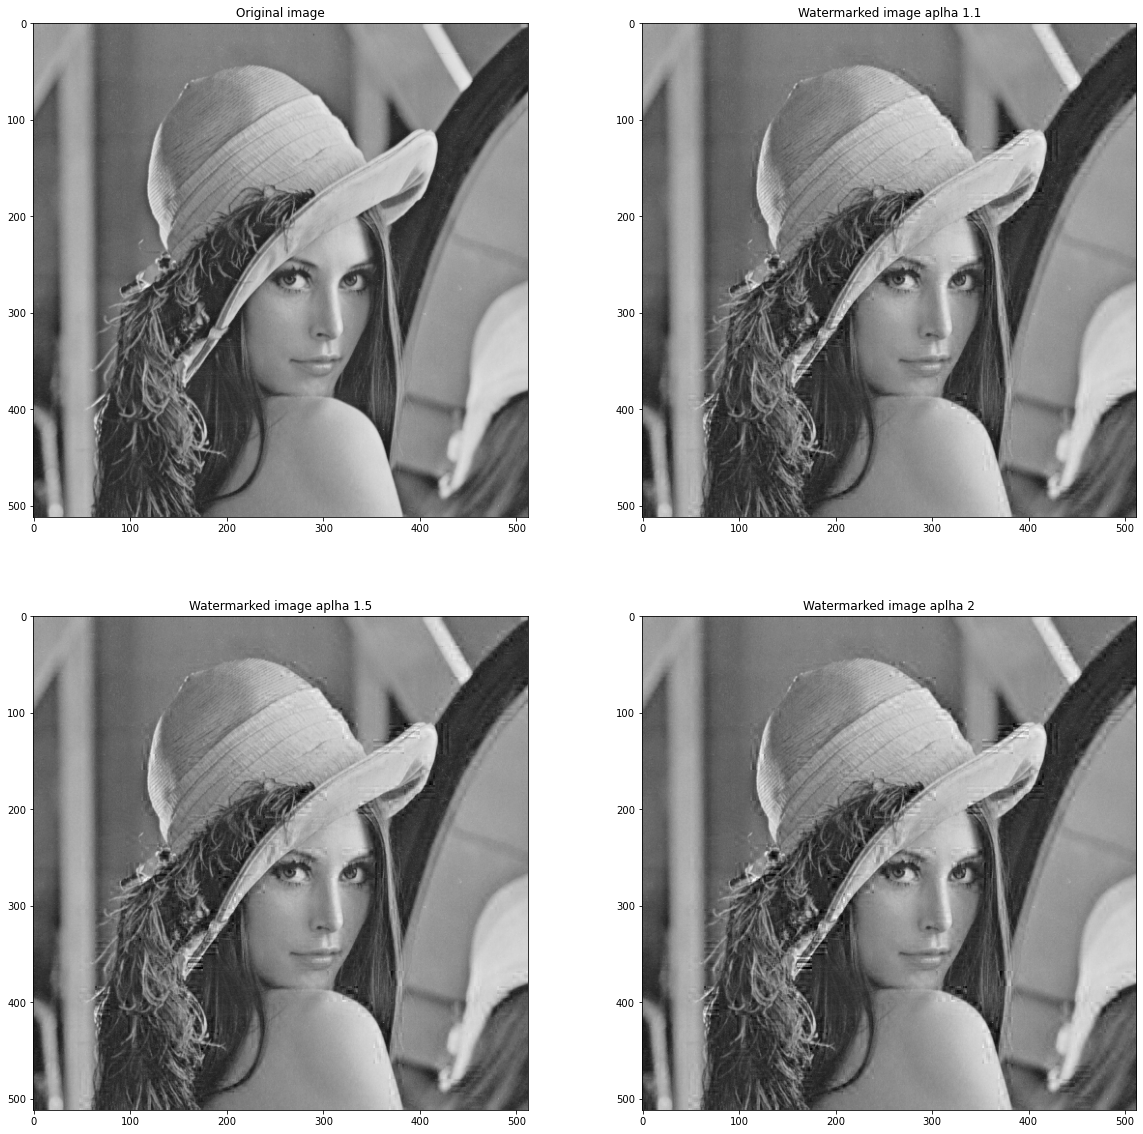

In [7]:
ori_img = Image.open(config.train_images_path + "lena_512x512.gif")
wat_img_1 = Image.open(config.embedded_images_path + "lena_512x512_11.gif")
wat_img_15 = Image.open(config.embedded_images_path + "lena_512x512_15.gif")
wat_img_2 = Image.open(config.embedded_images_path + "lena_512x512_2.gif")
plt.figure(figsize=(20, 20))

# Plot original image
ax = plt.subplot(2, 2, 1)
plt.imshow(ori_img)
plt.title( "Original image")
plt.gray()

# Plot LL of DWT-2D
ax = plt.subplot(2, 2, 2)
plt.imshow(wat_img_1)
plt.title( "Watermarked image aplha 1.1")
plt.gray()

# Plot LL of DWT-2D
ax = plt.subplot(2, 2, 3)
plt.imshow(wat_img_15)
plt.title( "Watermarked image aplha 1.5")
plt.gray()

# Plot LL of DWT-2D
ax = plt.subplot(2, 2, 4)
plt.imshow(wat_img_2)
plt.title( "Watermarked image aplha 2")
plt.gray()

plt.show()